In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import sklearn.metrics as metrics
from mpl_toolkits.mplot3d import Axes3D

### Predecir cuántas veces será compartido un artículo de Machine Learning.
Regresión lineal simple en Python (con 1 variable)
TIPS o sugerencias:
- [ ] Importar el data set
- [ ] Explorar los datos
- [ ] Elegir la variable a analizar
- [ ] Utilizar la libreria SciKitLearn
- [ ] Se sugiere tomar como inputs la columna  Word Count y como "etiquetas" la columna #Shares
- [ ] Graficar la exploracion de datos
- [ ] Calcular la Prediccion

In [2]:
# mint
ruta = '/home/jorge/Programacion/Ciencia Datos/IFTS11/Modelado IA/Entrega/ModelaIA'
articulos = pd.read_csv(ruta + '/articulos_ml.csv')

In [3]:
articulos

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000
...,...,...,...,...,...,...,...,...
156,[Log] 83: How Google Uses Machine Learning And...,[Log] 83: http://feedproxy.google.com/~r/Techc...,3239,3,11.0,1,84,3239
157,[Log] 84: Zuck Knows If You've Been Bad Or Goo...,[Log] 84: http://feedproxy.google.com/~r/Techc...,2566,3,8.0,4,85,25019
158,[Log] 85: Microsoft Improves Windows Phone Voi...,[Log] 85: http://feedproxy.google.com/~r/Techc...,2089,4,4.0,1,86,49614
159,[Log] 86: How Google's Acquisition Of DNNresea...,[Log] 86: http://feedproxy.google.com/~r/Techc...,1530,4,12.0,3,87,33660


In [4]:
articulos.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [5]:
articulos.tail()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
156,[Log] 83: How Google Uses Machine Learning And...,[Log] 83: http://feedproxy.google.com/~r/Techc...,3239,3,11.0,1,84,3239
157,[Log] 84: Zuck Knows If You've Been Bad Or Goo...,[Log] 84: http://feedproxy.google.com/~r/Techc...,2566,3,8.0,4,85,25019
158,[Log] 85: Microsoft Improves Windows Phone Voi...,[Log] 85: http://feedproxy.google.com/~r/Techc...,2089,4,4.0,1,86,49614
159,[Log] 86: How Google's Acquisition Of DNNresea...,[Log] 86: http://feedproxy.google.com/~r/Techc...,1530,4,12.0,3,87,33660
160,[Log] 87: Google's Cloud Is Eating Apple's Lunch,[Log] 87: http://feedproxy.google.com/~r/Techc...,953,6,13.0,2,88,5956


In [6]:
articulos.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


In [7]:
articulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           161 non-null    object 
 1   url             122 non-null    object 
 2   Word count      161 non-null    int64  
 3   # of Links      161 non-null    int64  
 4   # of comments   129 non-null    float64
 5   # Images video  161 non-null    int64  
 6   Elapsed days    161 non-null    int64  
 7   # Shares        161 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 10.2+ KB


In [8]:
articulos.shape

(161, 8)

In [9]:
articulos.columns

Index(['Title', 'url', 'Word count', '# of Links', '# of comments',
       '# Images video', 'Elapsed days', '# Shares'],
      dtype='object')

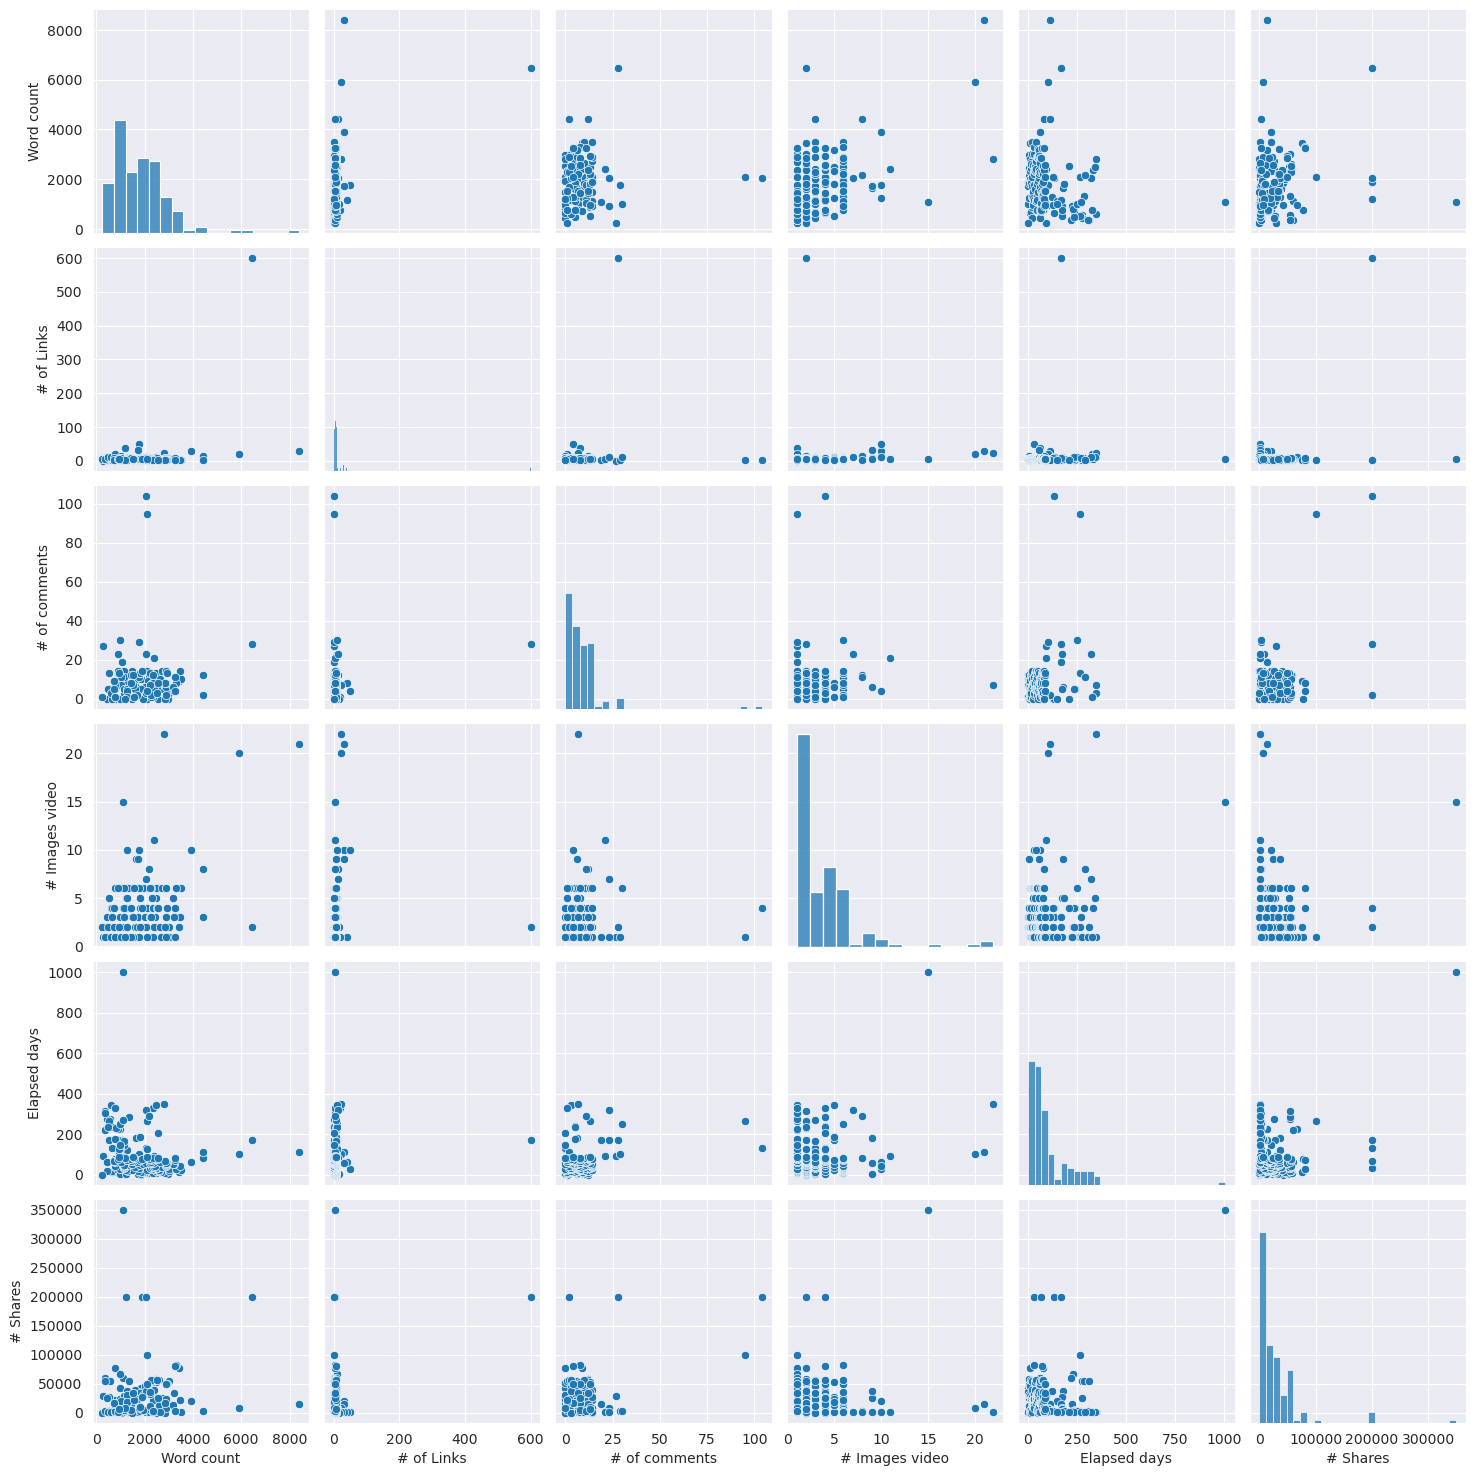

In [10]:
sns.pairplot(articulos)
plt.show()

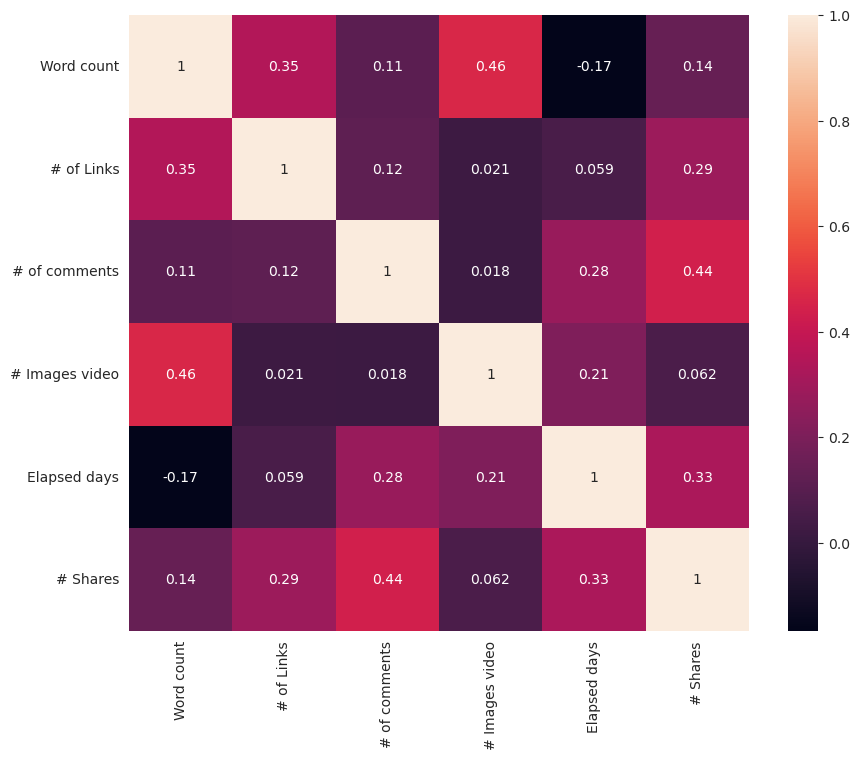

In [11]:

selected_columns = ['Word count', '# of Links', '# of comments', '# Images video', 'Elapsed days', '# Shares']
selected_data = articulos[selected_columns]

correlation_matrix = selected_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [12]:
nan_total = articulos.isna().sum()
print(nan_total)

Title              0
url               39
Word count         0
# of Links         0
# of comments     32
# Images video     0
Elapsed days       0
# Shares           0
dtype: int64


In [13]:
articulos_sin_nan = articulos.fillna(0)

In [14]:
articulos_sin_nan.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,0,1742,9,0.0,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,0,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,0,1221,3,0.0,2,68,200000
4,Nasa finds entire solar system filled with eig...,0,2039,1,104.0,4,131,200000


In [15]:
normal = articulos_sin_nan

In [16]:
normal.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,0,1742,9,0.0,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,0,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,0,1221,3,0.0,2,68,200000
4,Nasa finds entire solar system filled with eig...,0,2039,1,104.0,4,131,200000


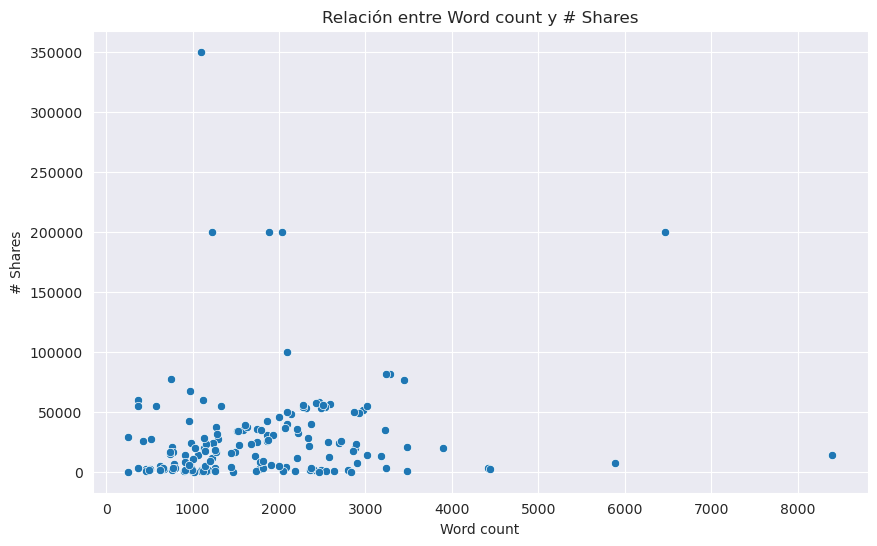

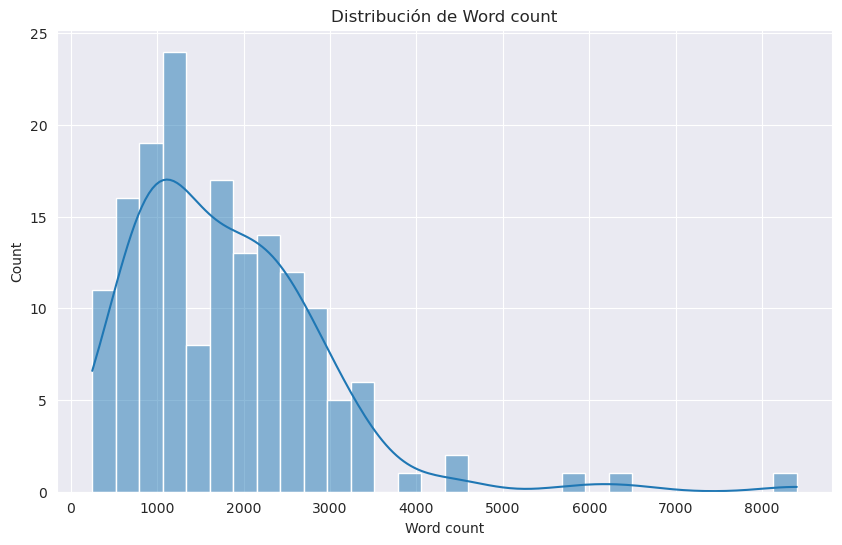

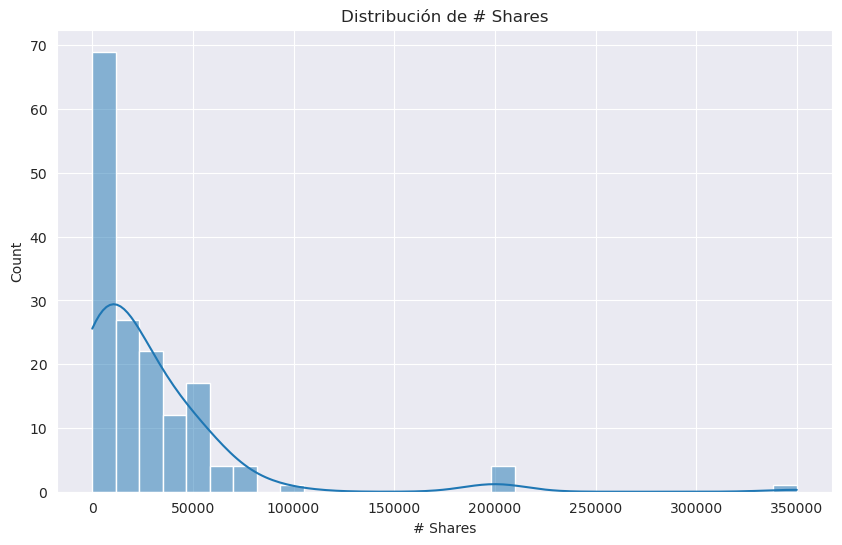

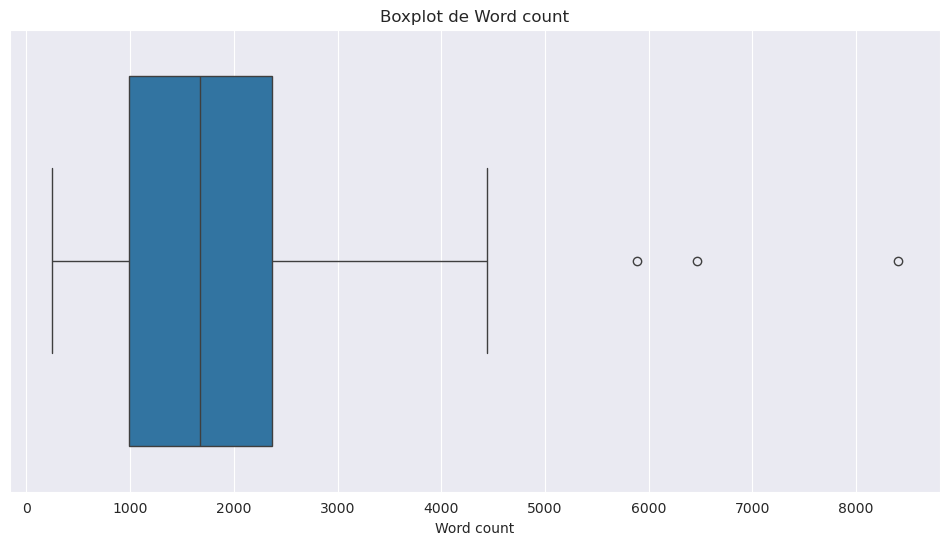

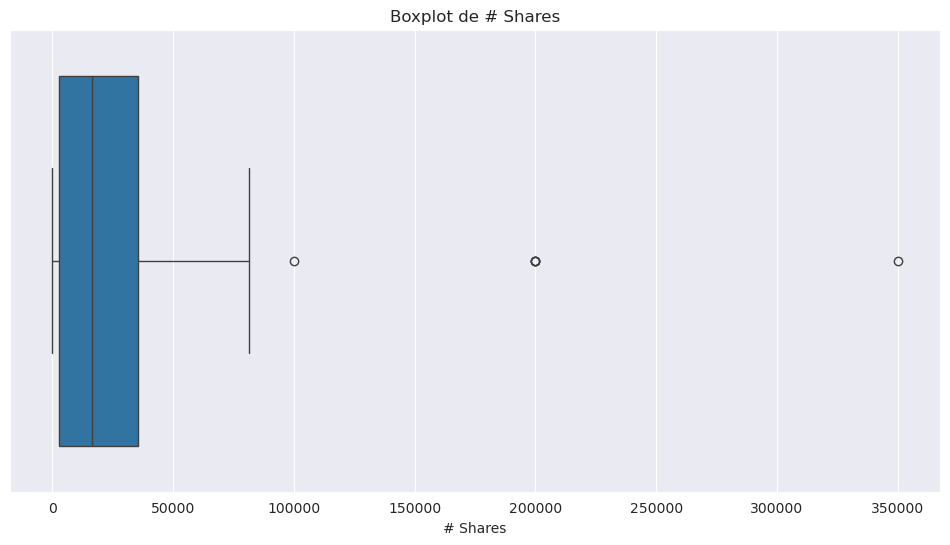

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Word count', y='# Shares', data=normal)
plt.title('Relación entre Word count y # Shares')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(normal['Word count'], bins=30, kde=True)
plt.title('Distribución de Word count')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(normal['# Shares'], bins=30, kde=True)
plt.title('Distribución de # Shares')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=normal['Word count'])
plt.title('Boxplot de Word count')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=normal['# Shares'])
plt.title('Boxplot de # Shares')
plt.show()

In [18]:
X = normal[['Word count']]
y = normal['# Shares']

regresion_lineal = LinearRegression()

modelo = regresion_lineal.fit(X, y)

coeficientes = modelo.coef_
interseccion = modelo.intercept_

y_pred = modelo.predict(X)

mse = metrics.mean_squared_error(y, y_pred)
r2 = metrics.r2_score(y, y_pred)

print(f"Coeficientes: {coeficientes}")
print(f"Intersección: {interseccion}")
print(f"MSE: {mse.round(4)}")
print(f"R^2: {r2.round(5)}")

Coeficientes: [5.38782563]
Intersección: 18205.753574904913
MSE: 1834933925.5549
R^2: 0.02009


In [19]:
# Calculamos una prediccion
nuevo_articulo = pd.DataFrame([[2000]], columns=['Word count'])

prediccion = modelo.predict(nuevo_articulo)

print(f"El artículo con un conteo de palabras de 2000 se compartirá aproximadamente {prediccion[0]} veces.")

El artículo con un conteo de palabras de 2000 se compartirá aproximadamente 28981.404826512848 veces.


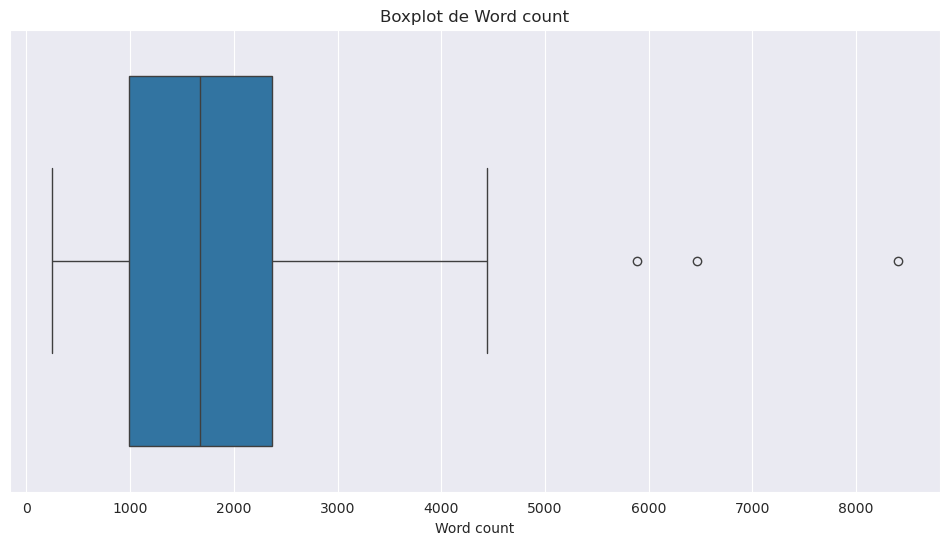

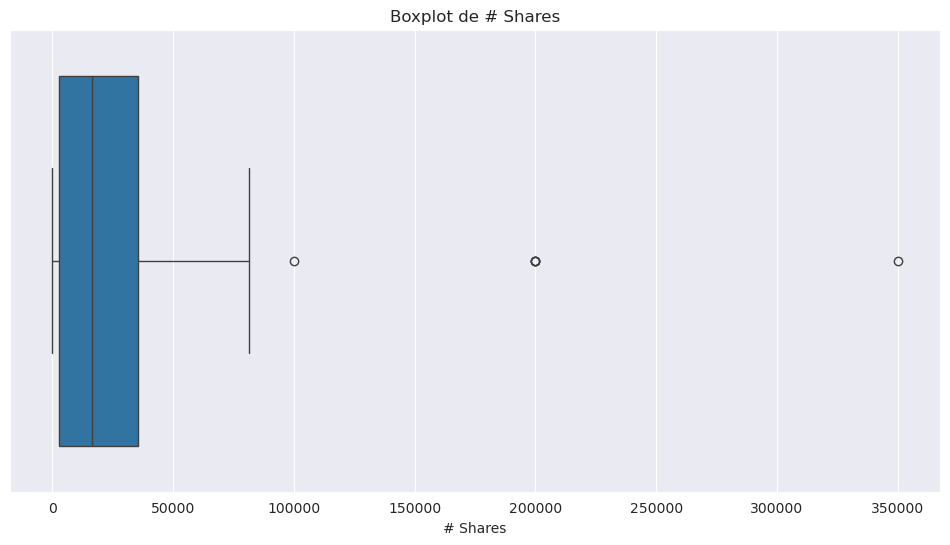

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=normal['Word count']) 
plt.title('Boxplot de Word count')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=normal['# Shares'])
plt.title('Boxplot de # Shares')
plt.show()

In [21]:
#eliminamos outliers con el rango intercuartílico
Q1W = normal['Word count'].quantile(0.25)
Q3W = normal['Word count'].quantile(0.75)
IQR_word_count = Q3W - Q1W

abajoW  = Q1W - 1.5 * IQR_word_count
arribaW = Q3W + 1.5 * IQR_word_count

articulos = normal[(normal['Word count'] >= abajoW) & (normal['Word count'] <= arribaW)]

Q1S = normal['# Shares'].quantile(0.25)
Q3S = normal['# Shares'].quantile(0.75)
IQR_shares = Q3S - Q1S

abajoS = Q1S - 1.5 * IQR_shares
arribaS = Q3S + 1.5 * IQR_shares

normal2 = normal[(normal['# Shares'] >= abajoS) & (normal['# Shares'] <= arribaS)]

In [22]:
X = normal2[['Word count']]
y = normal2['# Shares']

regresion_lineal = LinearRegression()

modelo2 = regresion_lineal.fit(X, y)

coeficientes = modelo2.coef_
interseccion = modelo2.intercept_

y_pred = modelo2.predict(X)

mse = metrics.mean_squared_error(y, y_pred)
r2 = metrics.r2_score(y, y_pred)

print(f"Coeficientes: {coeficientes}")
print(f"Intersección: {interseccion}")
print(f"MSE: {mse.round(4)}")
print(f"R^2: {r2.round(5)}")

Coeficientes: [2.96719322]
Intersección: 15675.848574378357
MSE: 419167715.1299
R^2: 0.02457


In [23]:
# Calculo la prediccion
nuevo_articulo = pd.DataFrame([[2000]], columns=['Word count'])

prediccion = modelo2.predict(nuevo_articulo)

print(f"El artículo con un conteo de palabras de 2000 se compartirá aproximadamente {prediccion[0]} veces.")

El artículo con un conteo de palabras de 2000 se compartirá aproximadamente 21610.23502375504 veces.


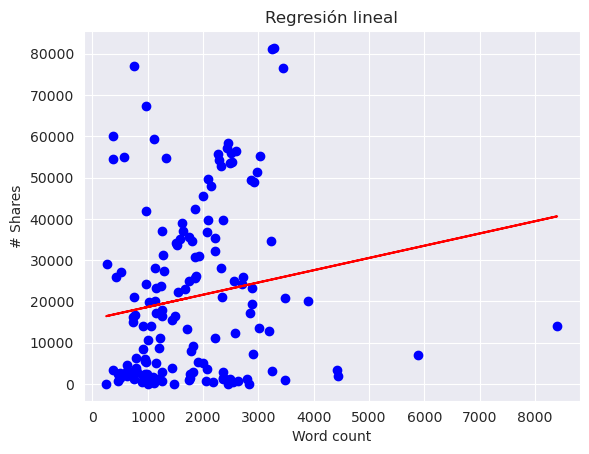

In [24]:
plt.scatter(X, y, color='blue')  # puntos de datos originales
plt.plot(X, y_pred, color='red')  # línea de tendencia

plt.title('Regresión lineal')
plt.xlabel('Word count')
plt.ylabel('# Shares')
plt.show()

### Regresión Lineal Múltiple
Extender el ejercicio utilizando más de una variable de entrada para el modelo. Esto le da mayor poder al algoritmo de Machine Learning, pues de esta manera podremos obtener predicciones más complejas.
Nuestra “ecuación de la Recta”, ahora pasa a ser:
Y = b + m1 X1 + m2 X2 + … + m(n) X(n)
TIPS:
- [ ] Utiliar 2 “variables predictivas” para poder graficar en 3D
- [ ] Visualizar un plano en 3 Dimensiones en Python
- [ ] Predicción con el modelo de Mútiples Variables
- [ ] SUGERENCIA: # Para poder graficar en 3D, crear una variable nueva que será la suma de los enlaces, comentarios e imágenes
La primer variable seguirá siendo la Word Count y la segunda variable será la suma de 3 columnas de entrada: la cantidad de enlaces, comentarios y cantidad de imágenes

In [25]:
# Creo una nueva columna que es la suma de '# of Links', '# of comments' y '# Images video'
normal['Suma'] = normal['# of Links'] + normal['# of comments'] + normal['# Images video']

X = normal[['Word count', 'Suma']]
y = normal['# Shares']

modelo = LinearRegression()
modelo.fit(X, y)

y_pred = modelo.predict(X)

In [26]:

mse = mean_squared_error(y, y_pred)
print(f"MSE: {mse}")

r2 = r2_score(y, y_pred)
print(f"R^2: {r2}")

MSE: 1655034368.494057
R^2: 0.11616087934130703


In [27]:
nuevo_articulo = pd.DataFrame([[2000, 100]], columns=['Word count', 'Suma'])

prediccion = modelo.predict(nuevo_articulo)

print(f"El artículo se compartirá aproximadamente {prediccion[0]} veces.")

El artículo se compartirá aproximadamente 51059.50980828698 veces.


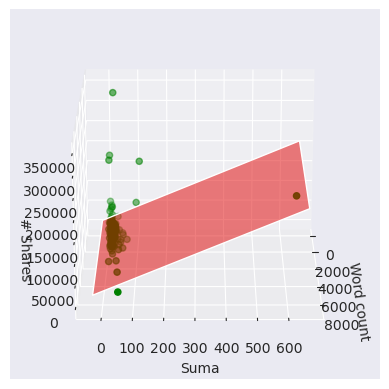

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(normal['Word count'], normal['Suma'], y, color='green')

x1 = np.array(ax.get_xlim())
x2 = np.array(ax.get_ylim())
xx1, xx2 = np.meshgrid(x1, x2)
yy = modelo.intercept_ + modelo.coef_[0]*xx1 + modelo.coef_[1]*xx2
ax.plot_surface(xx1, xx2, yy, color='red', alpha=0.5)

ax.set_xlabel('Word count')
ax.set_ylabel('Suma')
ax.set_zlabel('# Shares')

ax.view_init(elev=20, azim=0)

plt.show()

## Conclusión y Mejora de nuestro modelo
Explicar conclusiones y como se podria mejorar el modelo

### Regresion Lineal Simple

En cuanto a la regresión lineal, partiendo de la problemática de conocer los shares respecto a la cantidad de palabras, realicé un análisis de la estructura de los datos. Encontré valores faltantes (NaN) y los reemplacé por '0'. Observé la matriz de correlación, que no mostraba mucha solidez entre los valores del dataset. Preparé los datos para ingresarlos al modelo, y los resultados fueron muy pequeños (MSE: 1834933925.5549, R^2: 0.02009). Traté de mejorar el modelo eliminando outliers, obteniendo (MSE: 419167715.1299, R^2: 0.02457). Para mi sorpresa, el modelo con outliers tenía mejores resultados. En conclusión, con esta cantidad de datos, es difícil precisar un modelo más efectivo.

### Regresion Lineal Múltiple

En cuanto a la regresion multiples es mucho mas efectiva, por ser mas complejo y aportar mayor cantidad de datos al modelo, para mejorar implementaria una estandarizacion de los datos para que el modelo sea mas efectivo.